The purpose of exploratory data analysis is to explore the interactions of attributes and the target variable to help discover drivers of the target.

Process:
1. Hypothesize
2. Visualize
3. Test

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from prepare import prep_titanic
from prepare import train_validate_test_split


In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.drop(columns='Unnamed: 0',inplace=True)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
titanic = prep_titanic(titanic)

In [7]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,S,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,S,1,1,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,1,0,0


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            712 non-null    int64  
 1   pclass              712 non-null    int64  
 2   age                 712 non-null    float64
 3   sibsp               712 non-null    int64  
 4   parch               712 non-null    int64  
 5   fare                712 non-null    float64
 6   embarked            712 non-null    object 
 7   alone               712 non-null    int64  
 8   is_female           712 non-null    uint8  
 9   embark_Cherbourg    712 non-null    uint8  
 10  embark_Queenstown   712 non-null    uint8  
 11  embark_Southampton  712 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(4)
memory usage: 52.8+ KB


In [9]:
train, validate, test = train_validate_test_split(titanic, 'survived')

In [11]:
train.shape, validate.shape, test.shape

((398, 12), (171, 12), (143, 12))

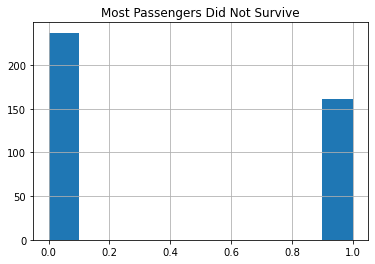

In [12]:
plt.title("Most Passengers Did Not Survive")
train.survived.hist()
plt.show()

In [14]:
# Find the percentage of survivors
print('Percent survived from train:', round(train.survived.mean(), 3))

Percent survived from train: 0.405


<AxesSubplot:title={'center':'Nearly as many 3rd class passengers as 1st and 2nd'}>

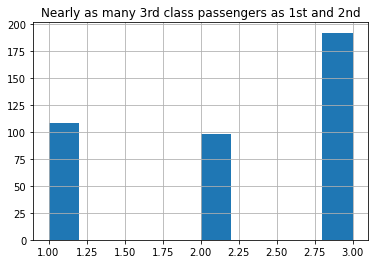

In [15]:
plt.title('Nearly as many 3rd class passengers as 1st and 2nd')
train.pclass.hist()

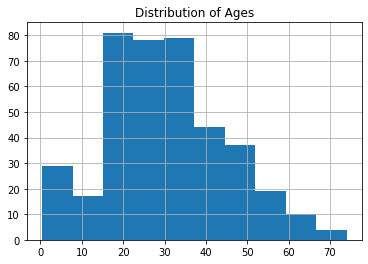

In [16]:
plt.title("Distribution of Ages")
train.age.hist()
plt.show()

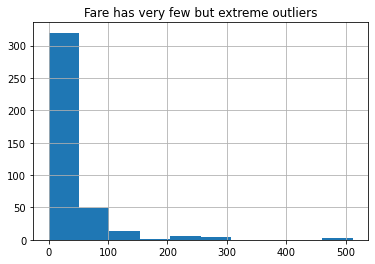

In [17]:
plt.title("Fare has very few but extreme outliers")
train.fare.hist()
plt.show()

# Takeaways
* ~60% perished and ~40% survived. We will predict 'not_survived' for our baseline to test the usefulness of features later when we get to modeling.
* There were more 3rd class passengers than 1st and 2nd class.
* The age of passengers is (fairly)normally distributed.
* There are extreme outliers in fare.

## Let's Visualize and Test some Categorical Variables to the Target

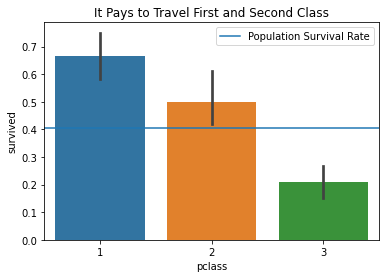

In [19]:
plt.title('It Pays to Travel First and Second Class')
sns.barplot(x='pclass', y='survived', data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label='Population Survival Rate')
plt.legend()
plt.show()

In [20]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and class of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between class of ticket and survival


# Takeaways
* Maybe create an 'is_first_class' and 'is_third_class' feature for modeling.

### Take a look at the observations where pclass is 3 and age is less than 10 years old.

In [31]:
train[(train.pclass == 3)]

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
157,0,3,30.0,0,0,8.0500,S,1,0,0,0,1
881,0,3,33.0,0,0,7.8958,S,1,0,0,0,1
90,0,3,29.0,0,0,8.0500,S,1,0,0,0,1
355,0,3,28.0,0,0,9.5000,S,1,0,0,0,1
108,0,3,38.0,0,0,7.8958,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
836,0,3,21.0,0,0,8.6625,S,1,0,0,0,1
693,0,3,25.0,0,0,7.2250,C,1,0,1,0,0
14,0,3,14.0,0,0,7.8542,S,1,1,0,0,1
821,1,3,27.0,0,0,8.6625,S,1,0,0,0,1


Let's visualize the fate of passengers under 10 years old.

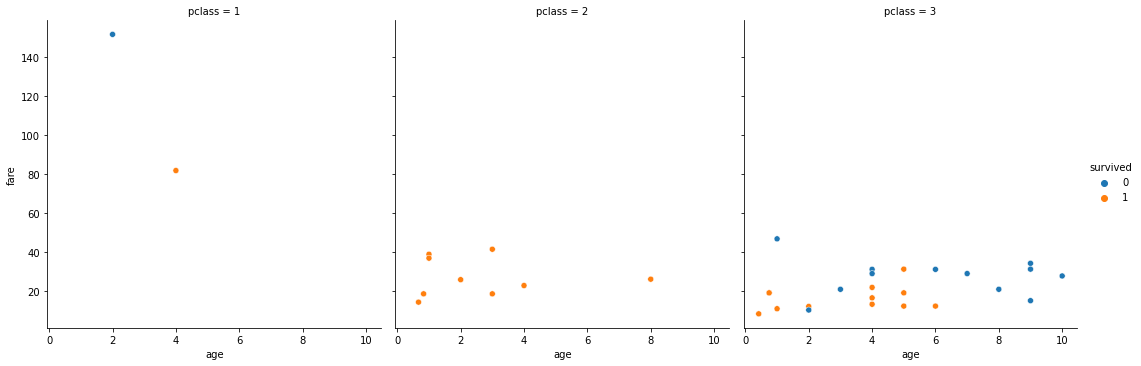

In [40]:
rel = sns.relplot(x='age', y='fare', data=train[train.age <= 10], col='pclass', hue='survived')

# Takeaways
* There were far more children in 3rd class than there were in 1st and 2nd.
* All of the children <= 10 yrs in 2nd class survived.
* Half of the children <= 10 yrs in 3rd class survived.
* There were only two children <= 10 yrs in first class and one survived.

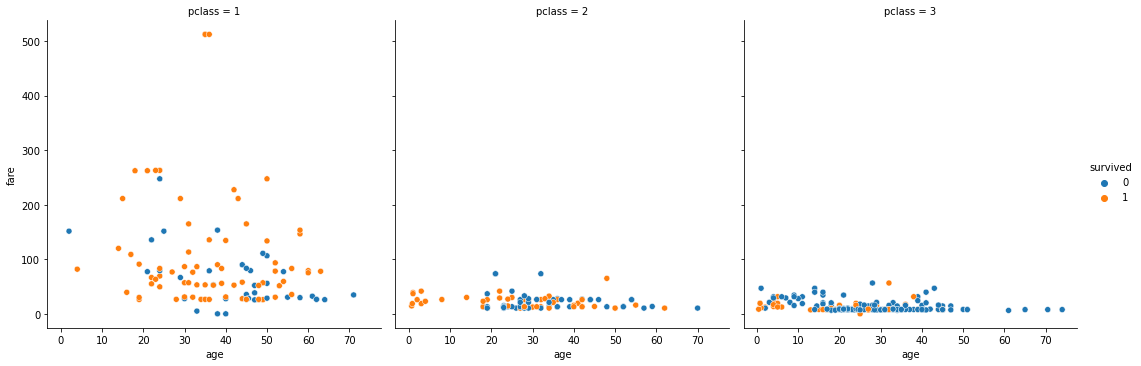

In [41]:
rel = sns.relplot(x='age', y='fare', data=train, col='pclass', hue='survived')

# Takeaways
* 2nd class passengers between the ages of 0 and 10 seem to have a high survival rate.
* There seems to be a group of passengers in 3rd class that have a higher chance of survival.

In [44]:
third_class_children = train[(train.pclass == 3) & (train.age <=10)]

In [46]:
third_class_children[third_class_children.survived == 1].parch.value_counts()

1    9
2    2
0    1
Name: parch, dtype: int64

In [47]:
third_class_children[third_class_children.survived == 0].parch.value_counts()

1    6
2    6
Name: parch, dtype: int64

In [48]:
third_class_children.parch.value_counts()

1    15
2     8
0     1
Name: parch, dtype: int64

# Takeaways
* Out of the children in third class, the parch columns seems to be correlated to survivale rate. I will run a statistical test to verify this.

In [51]:
# Add 'ten_and_under' column
train['ten_and_under'] = (train.age <= 10)*1

In [79]:
# Verify
train[(train.age <=10) & (train.parch != 0)]

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton,ten_and_under
850,0,3,4.00,4,2,31.2750,S,0,0,0,0,1,1
479,1,3,2.00,0,1,12.2875,S,0,1,0,0,1,1
297,0,1,2.00,1,2,151.5500,S,0,1,0,0,1,1
184,1,3,4.00,0,2,22.0250,S,0,1,0,0,1,1
751,1,3,6.00,0,1,12.4750,S,0,0,0,0,1,1
407,1,2,3.00,1,1,18.7500,S,0,0,0,0,1,1
205,0,3,2.00,0,1,10.4625,S,0,1,0,0,1,1
172,1,3,1.00,1,1,11.1333,S,0,1,0,0,1,1
803,1,3,0.42,0,1,8.5167,C,0,0,1,0,0,1
183,1,2,1.00,2,1,39.0000,S,0,0,0,0,1,1


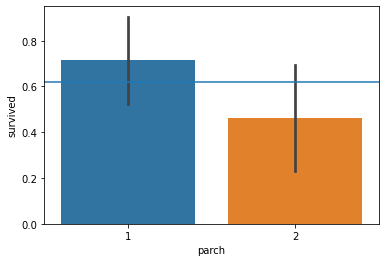

In [85]:
sns.barplot(x="parch", y="survived", data=train[(train.age <= 10) & (train.parch != 0)])
population_survival_rate = train[(train.age <= 10) & (train.parch != 0)].survived.mean()
plt.axhline(population_survival_rate, label='Population survival rate')
plt.show()

## Set hypothesis:
$H_0$: Survival and parch are independent for third class passengers under ten years old. 

$H_a$: Survival and parch are dependent for third class passengers under ten years old.

In [49]:
null_hypothesis = 'Survival and parch are independent for third class passengers under ten years old.'
alternative_hypothesis = 'Survival and parch are dependent for third class passengers under ten years old.'

In [ ]:
alpha = 0.05

In [81]:
observed = pd.crosstab(train[(train.age <=10) & (train.parch !=0)].survived, train[(train.age <=10) & (train.parch!=0)].parch)

In [82]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
    print('Sufficient evidence to move forward understanding that', alternative_hypothesis)
else:
    print('Fail to reject the null hypothesis.')
    print('Insufficient evidence to reject the null hypothesis.')

Fail to reject the null hypothesis.
Insufficient evidence to reject the null hypothesis.


# Takeaways
* I thought I was on to a driver of the target, but statistical testing proved otherwise. I hope that hour is worth it.

### Let's investigate 2nd Class passengers:

In [88]:
second_class = train[train.pclass==2]

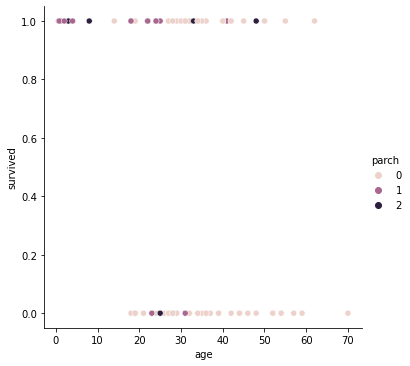

In [91]:
sns.relplot(x='age', y='survived', data=second_class, hue='parch')

### Question: Does having parch == 1 give you a better chance of survival for second class passengers?

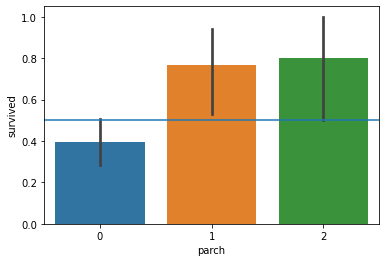

In [92]:
sns.barplot(x="parch", y="survived", data=second_class)
population_survival_rate = second_class.survived.mean()
plt.axhline(population_survival_rate, label='Population survival rate')
plt.show()

# Takeaways
* It seems as if having parch == 1 gives you a slightly better chance of surviving in second class. I will verify this using a contingency test.

In [93]:
# Set hypothesis
null_hypothesis = 'Survival and parch are independent for second class passengers.'
alternative_hypothesis = 'Survival and parch are dependent for second class passengers.'

In [94]:
observed = pd.crosstab(second_class.survived, second_class.parch)

In [95]:
observed

parch,0,1,2
survived,,,
0,43,4,2
1,28,13,8


In [96]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print('Reject the null hypothesis that', null_hypothesis)
    print('Sufficient evidence to move forward understanding that', alternative_hypothesis)
else:
    print('Fail to reject the null hypothesis.')
    print('Insufficient evidence to reject the null hypothesis.')

Reject the null hypothesis that Survival and parch are independent for second class passengers.
Sufficient evidence to move forward understanding that Survival and parch are dependent for second class passengers.


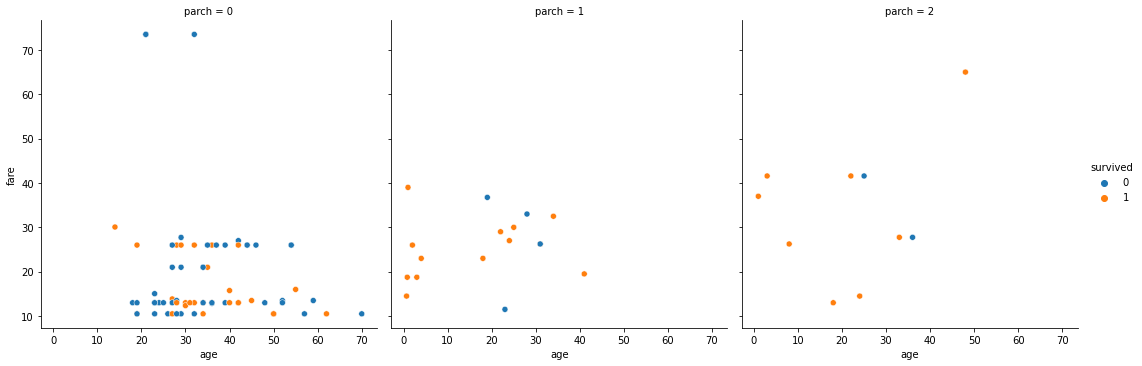

In [97]:
rel = sns.relplot(x='age', y='fare', data=second_class, col='parch', hue='survived')

In [109]:
train[(train.pclass==2) & (train.parch==1)].index

Int64Index([580, 801, 407, 183, 600, 272, 755, 323, 831, 416, 145, 651, 848,
            529, 637, 340, 750],
           dtype='int64')